In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy

from scipy.stats import multivariate_normal, norm
from numpy.random import seed, uniform, randn
from numpy.linalg import inv

9.3

$$
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \theta \ \ \ \ \ \ \ \ \ \ \sigma \\  

\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \downarrow \ \ \ \swarrow \\  

x_{n} \ \ \rightarrow \ \ \ \ y_{n} \ \ \\  

n\ =\ 1,......,N\ \\  

\\  
$$

figure 9.5

In [2]:
N = 10
mu = 0
sigma = 0.2**2

xn = np.random.uniform(-5, 5, N)
epsilon = np.random.normal(mu, sigma, N)
yn = -np.sin(xn/5) + np.cos(xn) + epsilon
dataset = np.column_stack((xn, yn))
xn = xn.reshape(-1,1)
yn = yn.reshape(-1,1)

(-5.0, 5.0)

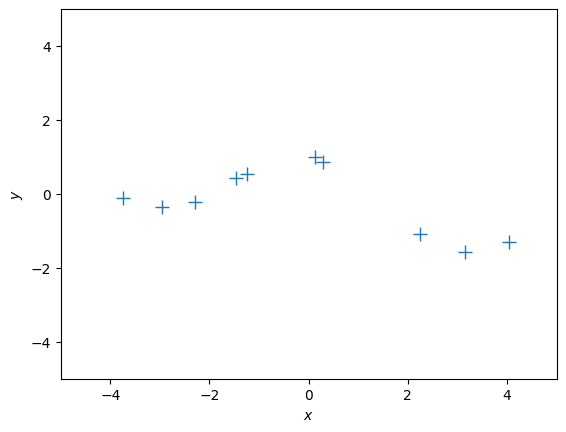

In [3]:
# Plot the training set
plt.figure()
plt.plot(xn, yn, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.ylim(-5, 5) 
plt.xlim(-5, 5) 

In [4]:
N, D = xn.shape
X_aug = np.hstack([np.ones((N,1)), xn]) # augmented training inputs of size N x (D+1)
# theta_aug = np.zeros((D+1, 1)) # new theta vector of size (D+1) x 1

In [5]:
def max_lik_estimate(X, y):
    
    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: maximum likelihood parameters (D x 1)
    
    N, D = X.shape
    theta_ml = np.linalg.solve(X.T @ X, X.T @ y) ## <-- SOLUTION
    return theta_ml

In [6]:
theta_aug_ml = max_lik_estimate(X_aug, yn)
theta_aug_ml

array([[-0.2123287 ],
       [-0.18826531]])

In [7]:
ml_predictions = X_aug @ theta_aug_ml 
# X: K x D matrix of test inputs
# theta: D x 1 vector of parameters
# returns: prediction of f(X); K x 1 vector


In [8]:
ml_predictions.shape

(10, 1)

(-5.0, 5.0)

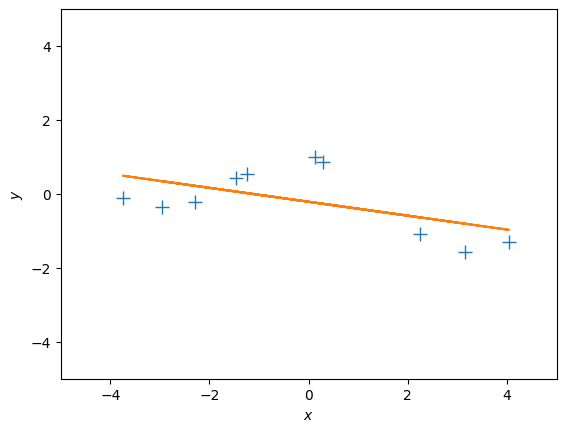

In [9]:
# Plot the training set
plt.figure()
plt.plot(xn, yn, '+', markersize=10)
plt.plot(xn, ml_predictions)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.ylim(-5, 5) 
plt.xlim(-5, 5) 

In [10]:
def poly_features(X, p):
    """Returns a matrix with p columns containing the polynomial features of the input vector X."""
    X = X.flatten()
    return np.array([1.0*X**i for i in range(p+1)]).T

In [11]:
def nonlinear_features_maximum_likelihood(Phi, y):
    # Phi: features matrix for training inputs. Size of N x D
    # y: training targets. Size of N by 1
    # returns: maximum likelihood estimator theta_ml. Size of D x 1
    
    kappa = 1e-08 # 'jitter' term; good for numerical stability
    
    D = Phi.shape[1]  
    
    # maximum likelihood estimate
    Pt = Phi.T @ y # Phi^T*y
    PP = Phi.T @ Phi + kappa*np.eye(D) # Phi^T*Phi + kappa*I
        
    # maximum likelihood estimate
    C = scipy.linalg.cho_factor(PP)
    theta_ml = scipy.linalg.cho_solve(C, Pt) # inv(Phi^T*Phi)*Phi^T*y 
    
    return theta_ml

In [12]:
p = 4
Phi = poly_features(xn, p)
theta_ml = nonlinear_features_maximum_likelihood(Phi, yn)
X_test = np.linspace(-5,5, 100).reshape(-1,1)
Phi_test =  poly_features(X_test, p)
y_pred = Phi_test @ theta_ml

(-5.0, 5.0)

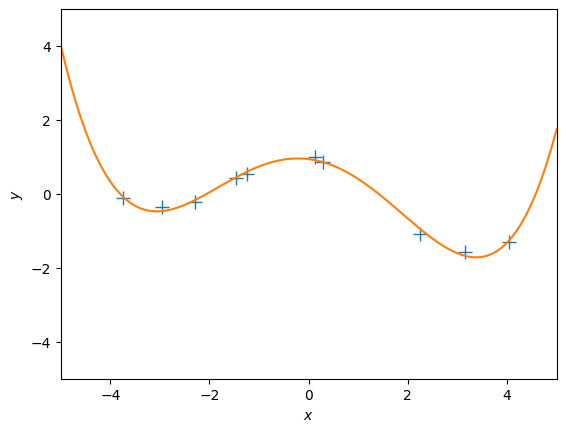

In [13]:
# Plot the training set
plt.figure()
plt.plot(xn, yn, '+', markersize=10)
plt.plot(X_test, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.ylim(-5, 5) 
plt.xlim(-5, 5) 

Figure 9.6

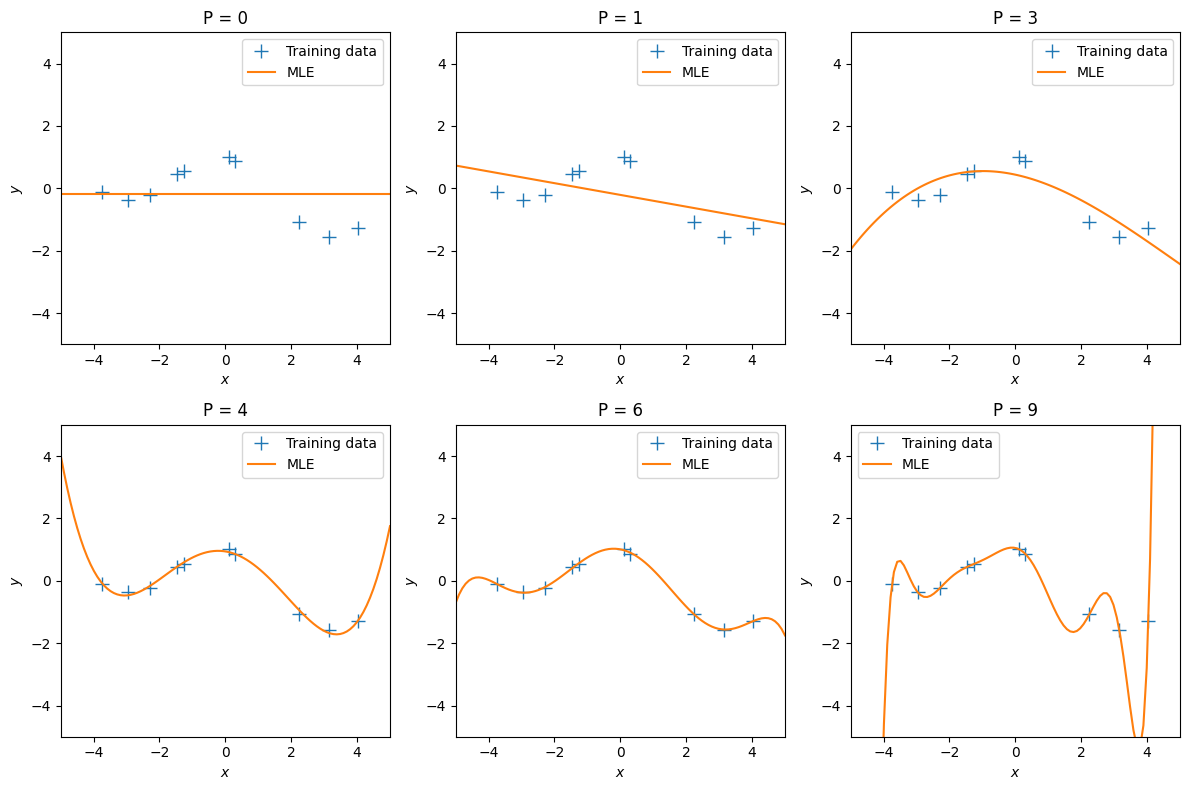

In [14]:
# Values of p to consider
p_values = [0, 1, 3, 4, 6, 9]

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i, p in enumerate(p_values):

    Phi = poly_features(xn, p)
    theta_ml = nonlinear_features_maximum_likelihood(Phi, yn)
    Phi_test = poly_features(X_test, p)
    y_pred = Phi_test @ theta_ml

    ax = axs[i // 3, i % 3]  # Get the correct subplot
    ax.plot(xn, yn, '+', markersize=10,label='Training data')
    ax.plot(X_test, y_pred, label = 'MLE')
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_ylim(-5, 5)
    ax.set_xlim(-5, 5)
    ax.set_title(f"P = {p}")
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [25]:
%config InlineBackend.figure_format = "retina"

In [31]:
def f(x, a): return a[0] + a[1] * x



def plot_prior(m, S, liminf=-1, limsup=1, step=0.05, ax=plt, **kwargs):
    grid = np.mgrid[liminf:limsup + step:step, liminf:limsup + step:step]
    nx = grid.shape[-1]
    z = multivariate_normal.pdf(grid.T.reshape(-1, 2), mean=m.ravel(), cov=S).reshape(nx, nx).T
    
    return ax.contourf(*grid, z, **kwargs)

def plot_sample_w(mean, cov, size=10, ax=plt):
    w = np.random.multivariate_normal(mean=mean.ravel(), cov=cov, size=size)
    x = np.linspace(-1, 1)
    for wi in w:
        ax.plot(x, f(x, wi), c="tab:blue", alpha=0.4)

def plot_likelihood_obs(X, T, ix, ax=plt):
    """
    Plot the likelihood function of a single observation
    """
    W = np.mgrid[-1:1:0.1, -1:1:0.1]
    x, t = sample_vals(X, T, ix) # ith row
    mean = W.T.reshape(-1, 2) @ x.T

    likelihood = norm.pdf(t, loc=mean, scale= np.sqrt(1 / beta)).reshape(20, 20).T
    ax.contourf(*W, likelihood)
    ax.scatter(-0.3, 0.5, c="white", marker="+")

def sample_vals(X, T, ix):
    """
    
    Returns
    -------
    Phi: The linear model transormation
    t: the target datapoint
    return ith data
    """
    x_in = X[ix]
    Phi = np.c_[np.ones_like(x_in), x_in]
    t = T[[ix]]
    return Phi, t

def posterior_w(phi, t, S0, m0):
    """
    Compute the posterior distribution of 
    a Gaussian with known precision and conjugate
    prior a gaussian
    
    Parameters
    ----------
    phi: np.array(N, M)
    t: np.array(N, 1)
    S0: np.array(M, M)
        The prior covariance matrix
    m0: np.array(M, 1)
        The prior mean vector
    """
    SN = inv(inv(S0) + beta * phi.T @ phi)
    mN = SN @ (inv(S0) @ m0 + beta * phi.T @ t)
    return SN, mN


In [32]:
seed(314)
a = np.array([-0.3, 0.5])
N = 30
sigma = 0.2
X = uniform(-1, 1, (N, 1))
T = f(X, a) + randn(N, 1) * sigma

In [33]:
beta = (1 / sigma) ** 2 # precision
alpha = 2.0

In [39]:
SN = np.eye(2) / alpha
mN = np.zeros((2, 1))
seed(1643)

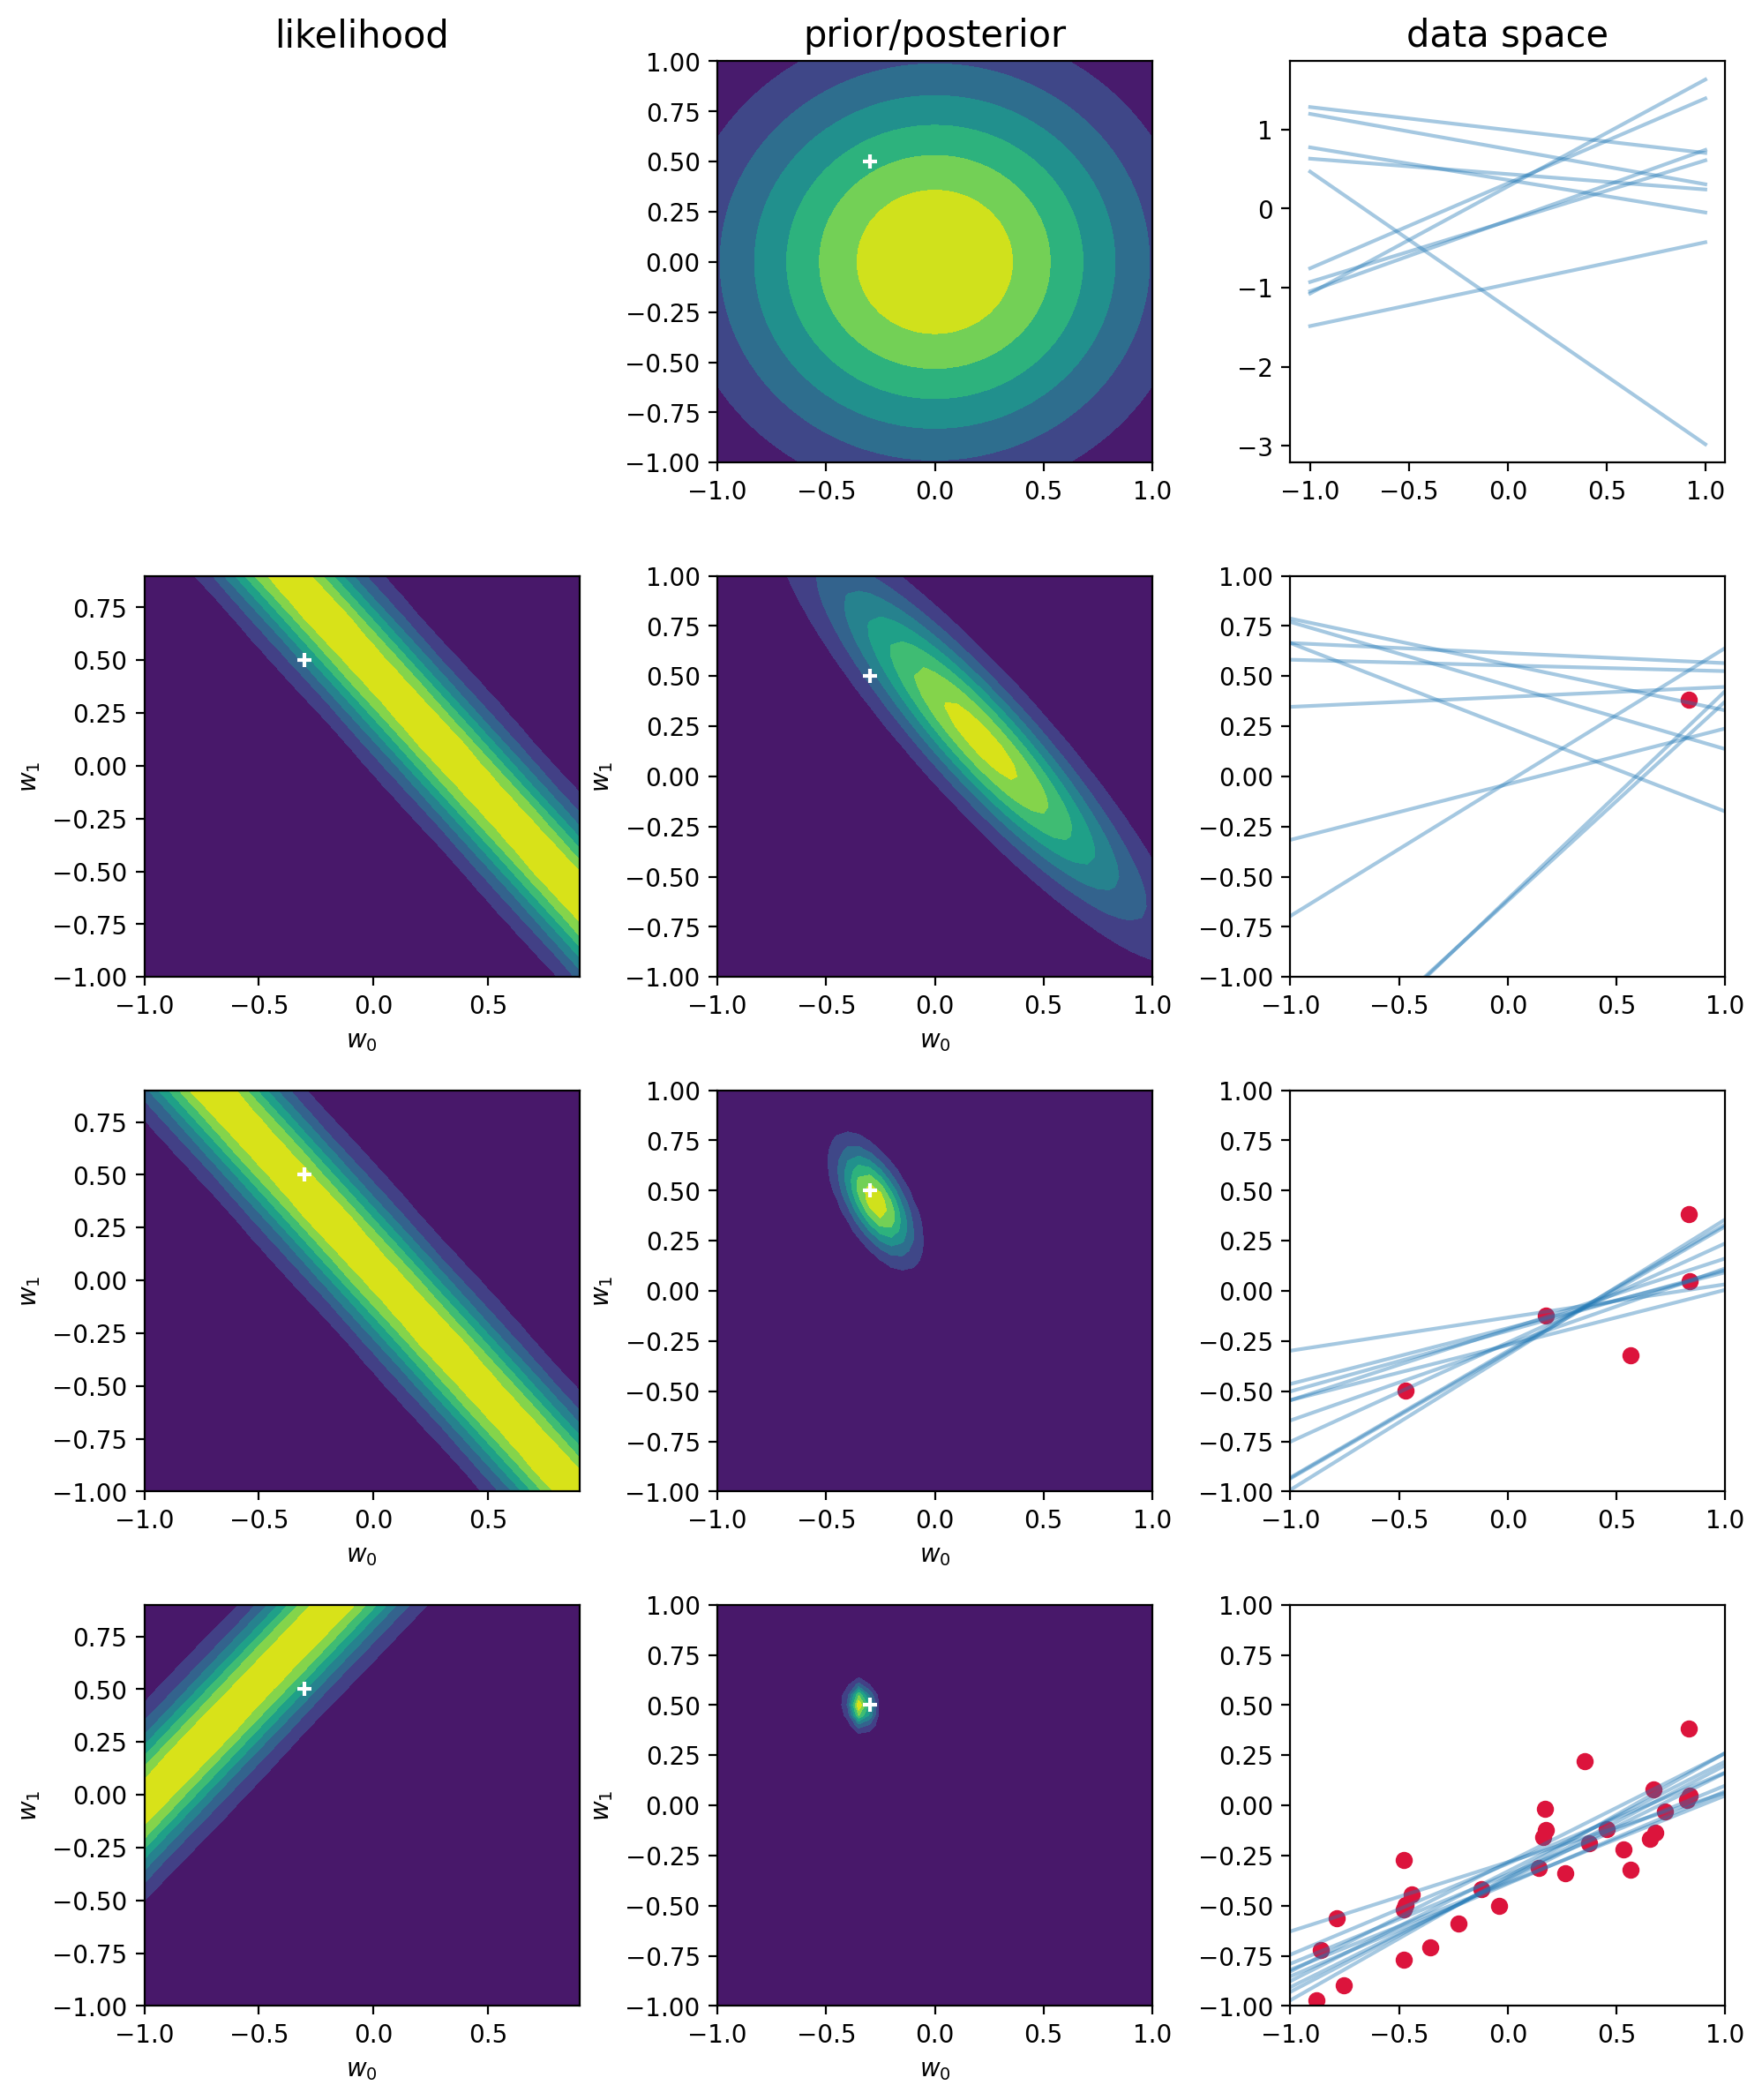

In [40]:
nobs = [1, 5,30]
ix_fig = 1
fig, ax = plt.subplots(len(nobs) + 1, 3, figsize=(10, 12))
plot_prior(mN, SN, ax=ax[0,1])
ax[0, 1].scatter(-0.3, 0.5, c="white", marker="+")
ax[0, 0].axis("off")
plot_sample_w(mN, SN, ax=ax[0, 2])
for i in range(0, N):
    Phi, t = sample_vals(X, T, i)
    SN, mN = posterior_w(Phi, t, SN, mN)
    if i+1 in nobs:
        plot_likelihood_obs(X, T, i, ax=ax[ix_fig, 0])
        plot_prior(mN, SN, ax=ax[ix_fig, 1])
        ax[ix_fig, 1].scatter(-0.3, 0.5, c="white", marker="+")
        ax[ix_fig, 2].scatter(X[:i + 1], T[:i + 1], c="crimson")
        ax[ix_fig, 2].set_xlim(-1, 1)
        ax[ix_fig, 2].set_ylim(-1, 1)
        for l in range(2):
            ax[ix_fig, l].set_xlabel("$w_0$")
            ax[ix_fig, l].set_ylabel("$w_1$")
        plot_sample_w(mN, SN, ax=ax[ix_fig, 2])
        ix_fig += 1

titles = ["likelihood", "prior/posterior", "data space"]
for axi, title in zip(ax[0], titles):
    axi.set_title(title, size=15)
plt.tight_layout()